<a href="https://colab.research.google.com/github/IkeSalmonson/sort_package/blob/main/sorter_main_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sort function

1 AI request: Let's create a new project.

create a simple python app with the following this assesment rules. Do not create all the code. Create all expected testes using Pytest lib and all files with just bolierplate imports :

 Rules ... <br>
 Implementation ...
 <br>
 2 AI request:
 lets implement main.py. Create the sort function. Start with the return variable as a stack = "REJECTED" assuming it's rejected and start checking for if bulky_check and heavy check. Then classify the input as one of the expected classes


In [1]:
%%writefile sort.py
# sorter/sort.py

def sort(width, height, length, mass):
    """
    Sorts a package into a stack based on its dimensions and mass.

    Args:
        width (int or float): The width of the package in cm.
        height (int or float): The height of the package in cm.
        length (int or float): The length of the package in cm.
        mass (int or float): The mass of the package in kg.

    Returns:
        str: The name of the stack ('STANDARD', 'SPECIAL', or 'REJECTED').
    """
    # Determine if the package is heavy using a ternary operator, as requested.
    is_heavy = True if mass >= 20 else False

    # Determine if the package is bulky
    volume = width * height * length
    is_bulky = volume >= 1_000_000 or width >= 150 or height >= 150 or length >= 150

    # Classify the package based on the checks
    if is_bulky and is_heavy:
        return "REJECTED"

    if is_bulky or is_heavy:
        return "SPECIAL"

    return "STANDARD"

Writing sort.py


# Testing

In [2]:
%%writefile test_sort.py
# tests/test_main.py
import pytest
from sort import sort

# Test cases are defined as tuples: (width, height, length, mass, expected_stack)
test_cases = [
    # 1. STANDARD packages (Not bulky, Not heavy)
    (10, 10, 10, 10, "STANDARD"),
    (100, 100, 99, 19, "STANDARD"), # Volume is 990,000 < 1,000,000
    (149, 10, 10, 19, "STANDARD"), # No dimension >= 150

    # 2. SPECIAL packages (Bulky OR Heavy, but not both)
    # Bulky by volume, but not heavy
    (100, 100, 100, 10, "SPECIAL"), # Volume is exactly 1,000,000
    (101, 100, 100, 15, "SPECIAL"), # Volume is > 1,000,000
    # Bulky by dimension, but not heavy
    (150, 10, 10, 10, "SPECIAL"),   # Width is exactly 150
    (10, 160, 10, 15, "SPECIAL"),   # Height is > 150
    (10, 10, 170, 19, "SPECIAL"),   # Length is > 150
    # Heavy, but not bulky
    (10, 10, 10, 20, "SPECIAL"),     # Mass is exactly 20
    (50, 50, 50, 25, "SPECIAL"),     # Mass is > 20

    # 3. REJECTED packages (Both Bulky AND Heavy)
    # Bulky by volume AND heavy
    (100, 100, 100, 20, "REJECTED"), # Volume >= 1,000,000 and Mass >= 20
    (120, 100, 100, 30, "REJECTED"), # Volume > 1,000,000 and Mass > 20
    # Bulky by dimension AND heavy
    (150, 10, 10, 20, "REJECTED"),   # Width >= 150 and Mass >= 20
    (100, 200, 10, 25, "REJECTED"),  # Height >= 150 and Mass >= 20
    (10, 10, 150, 22, "REJECTED"),   # Length >= 150 and Mass >= 20
]

@pytest.mark.parametrize("width, height, length, mass, expected", test_cases)
def test_sort_packages(width, height, length, mass, expected):
    """
    Tests the sort function with various package dimensions and masses.
    The @pytest.mark.parametrize decorator runs this test function once for each
    tuple in the 'test_cases' list.
    """
    assert sort(width, height, length, mass) == expected

Writing test_sort.py


In [3]:
!pytest


============================= test session starts ==============================
platform linux -- Python 3.11.13, pytest-8.3.5, pluggy-1.6.0
rootdir: /content
plugins: typeguard-4.4.4, langsmith-0.4.7, anyio-4.9.0
collected 15 items                                                             

test_sort.py ...............                                             [100%]

============================== 15 passed in 0.05s ==============================


# Live Coding

## create CSV packages.csv

In [4]:
packges_csv= '''Width,Height,Length,Mass
50,60,70,10
,None,50,5
200,100,50,25
150,150,150,30
60,80,100,-15
85,95,105,20
100,abc,100,40
20,30,40,0
95,105,115,24
100,100,100
45,55,65,12
-50,60,70,10
110,120,130,22
80,90,100,20,0
60,70,80,18
Width,Height,Length,Mass
140,150,160,35
70,80,90,15
,None,None,None
80,90,100,15
None,None,None,None
50,60,70,10
"100","100","100","40"
200,100,50,25
100,,100,40
30,40,50,5
150,150,150,30
55,65,75,14
60,80,100,15
90,100,110,26
100,100,100,40
85,80,75,14
20,30,40,8
70,65,60,12
90,95,100,20
55,50,45,10
65,75,85,16
,None,40,50,5
95,105,115,24
None,None,None,None
32,32,23ab,43'''

In [5]:
# prompt: based on packges_csv generate a csv file on the root folder

with open('packages.csv', 'w') as f:
    f.write(packges_csv)

#!cat packages.csv

## load csv into df

In [14]:
# prompt: base on the file from
# with open('packages.csv', 'r') as f:
#     file = f.read()
# create a function that takes in each row, create a comma separated list and filter all rows to have at max 4 values. Return pandas dataframe

import pandas as pd
import io

def process_package_rows(file_content):
  """
  Processes each row from a string file content, filters rows to have at most
  4 values, and returns a pandas DataFrame.

  Args:
    file_content (str): The content of the CSV file as a string.

  Returns:
    pd.DataFrame: A DataFrame containing the processed rows.
  """
  processed_rows = []
  # Split the file content into individual lines
  lines = file_content.strip().split('\n') ##check why strip().

  for line in lines:
    # Split each line by comma
    values = [value.strip() for value in line.split(',')]
    # Filter rows to have at most 4 values
    if len(values) <= 4:
      # Join the values back into a comma-separated string
      processed_rows.append(','.join(values))
    elif len(values) > 4:
      processed_rows.append(','.join(values[:4]))
    else:
      print(f"line has fewer than 4 values line{line}")
  # Join the processed rows back into a single string with newlines
  processed_content = '\n'.join(processed_rows)

  # Use pandas read_csv with io.StringIO to read the string as if it were a file
  df = pd.read_csv(io.StringIO(processed_content))

  return df

with open('packages.csv', 'r') as f:
    file = f.read()
# Assuming 'file' variable contains the content from 'packages.csv'
df_packages = process_package_rows(file)
df_packages.head()


,Width,Height,Length,Mass
0,50,60,70,10
1,NaN,NaN,50,5
2,200,100,50,25
3,150,150,150,30
4,60,80,100,-15


## Clean df
Handle any data inconsistencies, errors, or missing values gracefully.

In [20]:
# prompt: using pandas df df_packages['Width'] remove all lines with NaN values and save how many were removed  into a removed_rows variable

# Count the number of rows before removing NaNs
initial_rows = len(df_packages)

# Drop rows with NaN values in the 'Width' column
df_packages = df_packages.dropna()

# Count the number of rows after removing NaNs
rows_after_dropping = len(df_packages)

# Calculate the number of removed rows
removed_rows = initial_rows - rows_after_dropping

print(f"Number of rows removed: {removed_rows}")
print(df_packages.head())


Number of rows removed: 7
  Width Height Length Mass
0    50     60     70   10
2   200    100     50   25
3   150    150    150   30
4    60     80    100  -15
5    85     95    105   20


In [25]:
# prompt: create a filter for df_packages that tries to cast all row values into int and remove the row if it fails

def is_int_convertible_row(row):
  """Checks if all values in a row can be converted to integers."""
  for value in row.values:
    try:
      # Attempt to convert to int. This will raise a ValueError if it fails.
      int(value)
    except (ValueError, TypeError):
      # If conversion fails or value is not a number, return False
      return False
  # If all values were successfully converted or were numbers, return True
  return True

# Apply the filter to the DataFrame
# df_packages.apply(..., axis=1) applies the function row-wise
# .all() checks if all values in the resulting boolean Series are True
df_packages_int_only = df_packages[df_packages.apply(is_int_convertible_row, axis=1)].copy()

print("DataFrame after filtering for rows where all values can be converted to int:")
df_packages_int_only.head()

DataFrame after filtering for rows where all values can be converted to int:


,Width,Height,Length,Mass
0,50,60,70,10
2,200,100,50,25
3,150,150,150,30
4,60,80,100,-15
5,85,95,105,20
7,20,30,40,0
8,95,105,115,24
10,45,55,65,12
11,-50,60,70,10
12,110,120,130,22


In [29]:
# prompt: cast df_packges_int_only rows into ints

# Iterate through each column and cast to int
for col in df_packages_int_only.columns:
  df_packages_int_only[col] = df_packages_int_only[col].astype(int)

print("\nDataFrame after casting all columns to int:")
df_packages_int_only.head()
print("\nData types after casting:")
df_packages_int_only.dtypes


DataFrame after casting all columns to int:

Data types after casting:


,0
Width,int64
Height,int64
Length,int64
Mass,int64


In [31]:
# prompt: using pandas filter out all non positive integers in  df_packages_int_only

# Filter out rows where any value in 'Width', 'Height', 'Length', or 'Mass' is not positive
df_packages_positive_int_only = df_packages_int_only[(df_packages_int_only['Width'] > 0) &
                                            (df_packages_int_only['Height'] > 0) &
                                            (df_packages_int_only['Length'] > 0) &
                                            (df_packages_int_only['Mass'] > 0)].copy()

print("\nDataFrame after filtering for positive integers:")
print(df_packages_positive_int_only.head())
print("\nData types remain int after filtering:")
df_packages_positive_int_only.dtypes


DataFrame after filtering for positive integers:
   Width  Height  Length  Mass
0     50      60      70    10
2    200     100      50    25
3    150     150     150    30
5     85      95     105    20
8     95     105     115    24

Data types remain int after filtering:


,0
Width,int64
Height,int64
Length,int64
Mass,int64


## Calculate statistics

- **Calculate Statistics**:
    - Total number of packages in the data artifact. This total is used in the statistics calculations for each stack.
    - Number and percentage of packages in each stack (`STANDARD`, `SPECIAL`, `REJECTED`).
    - Average, minimum, and maximum `Mass` and `Volume` for each stack.

In [34]:
# prompt: aply sort funciton into df_packages_positive_int_only creating a new colum
from sort import sort
df_packages_positive_int_only['Stack'] = df_packages_positive_int_only.apply(
    lambda row: sort(row['Width'], row['Height'], row['Length'], row['Mass']),
    axis=1
)

print("\nDataFrame with 'Stack' column added:")
print(df_packages_positive_int_only.head())
print("\nValue counts for the 'Stack' column:")
print(df_packages_positive_int_only['Stack'].value_counts())


DataFrame with 'Stack' column added:
   Width  Height  Length  Mass   Volume     Stack
0     50      60      70    10   210000  STANDARD
2    200     100      50    25  1000000  REJECTED
3    150     150     150    30  3375000  REJECTED
5     85      95     105    20   847875   SPECIAL
8     95     105     115    24  1147125  REJECTED

Value counts for the 'Stack' column:
Stack
STANDARD    14
REJECTED    10
SPECIAL      4
Name: count, dtype: int64


In [35]:
# prompt: create a new statitics datafram evalutaing Average, minimum, and maximum Mass and Volume for each stack. from  df_packages_positive_int_only

# Calculate Volume for each package
df_packages_positive_int_only['Volume'] = df_packages_positive_int_only['Width'] * df_packages_positive_int_only['Height'] * df_packages_positive_int_only['Length']

# Group by 'Stack' and calculate the required statistics
stack_statistics = df_packages_positive_int_only.groupby('Stack').agg(
    Average_Mass=('Mass', 'mean'),
    Minimum_Mass=('Mass', 'min'),
    Maximum_Mass=('Mass', 'max'),
    Average_Volume=('Volume', 'mean'),
    Minimum_Volume=('Volume', 'min'),
    Maximum_Volume=('Volume', 'max')
)

print("\nStatistics by Stack:")
stack_statistics


Statistics by Stack:


,Average_Mass,Minimum_Mass,Maximum_Mass,Average_Volume,Minimum_Volume,Maximum_Volume
Stack,,,,,,
REJECTED,29.500000,22,40,1.812025e+06,1000000,3375000
SPECIAL,21.500000,20,26,8.532188e+05,720000,990000
STANDARD,12.428571,5,18,3.067232e+05,24000,720000


## Generate Report
- **Generate Summary Report**:
    - Display the statistics in a clear and organized format.
    - Ensure the report is easy to read and understand.

    <br> improvements: Generate AI summary


Statistics by Stack (reset index):
      Stack  Average_Mass  Minimum_Mass  Maximum_Mass  Average_Volume  \
0  REJECTED     29.500000            22            40    1.812025e+06   
1   SPECIAL     21.500000            20            26    8.532188e+05   
2  STANDARD     12.428571             5            18    3.067232e+05   

   Minimum_Volume  Maximum_Volume  
0         1000000         3375000  
1          720000          990000  
2           24000          720000  


/tmp/ipython-input-36-3572031095.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Average_Mass', data=stack_statistics_reset, palette='viridis')
/tmp/ipython-input-36-3572031095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Minimum_Mass', data=stack_statistics_reset, palette='viridis')
/tmp/ipython-input-36-3572031095.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Maximum_Mass', data=stack_statistics_reset, palette='viridis')


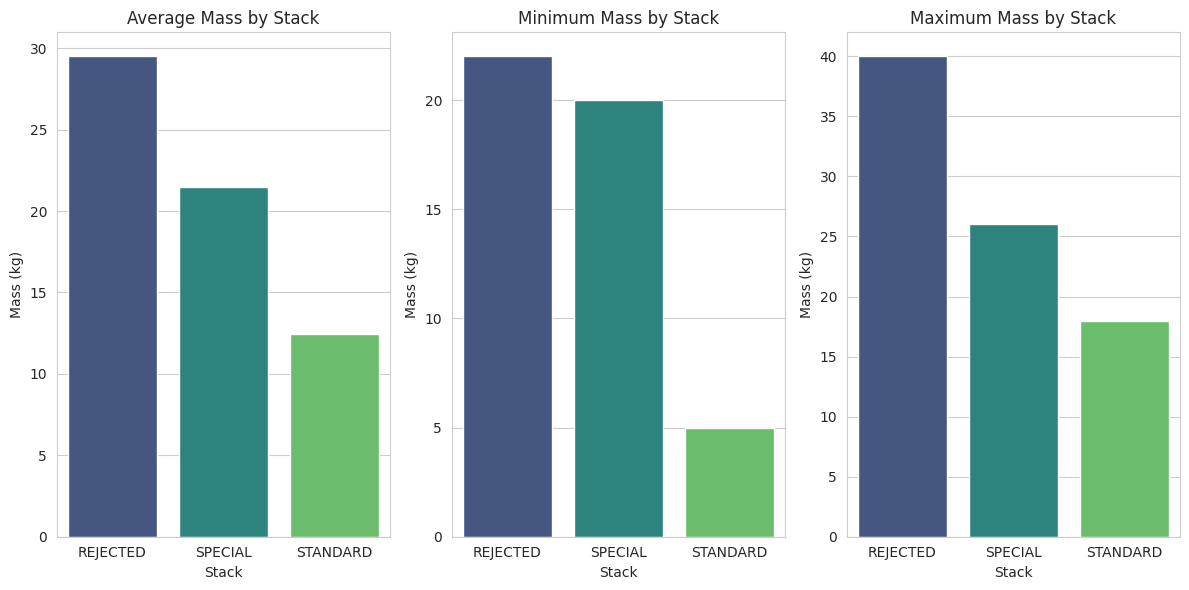

/tmp/ipython-input-36-3572031095.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Average_Volume', data=stack_statistics_reset, palette='plasma')
/tmp/ipython-input-36-3572031095.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Minimum_Volume', data=stack_statistics_reset, palette='plasma')
/tmp/ipython-input-36-3572031095.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stack', y='Maximum_Volume', data=stack_statistics_reset, palette='plasma')


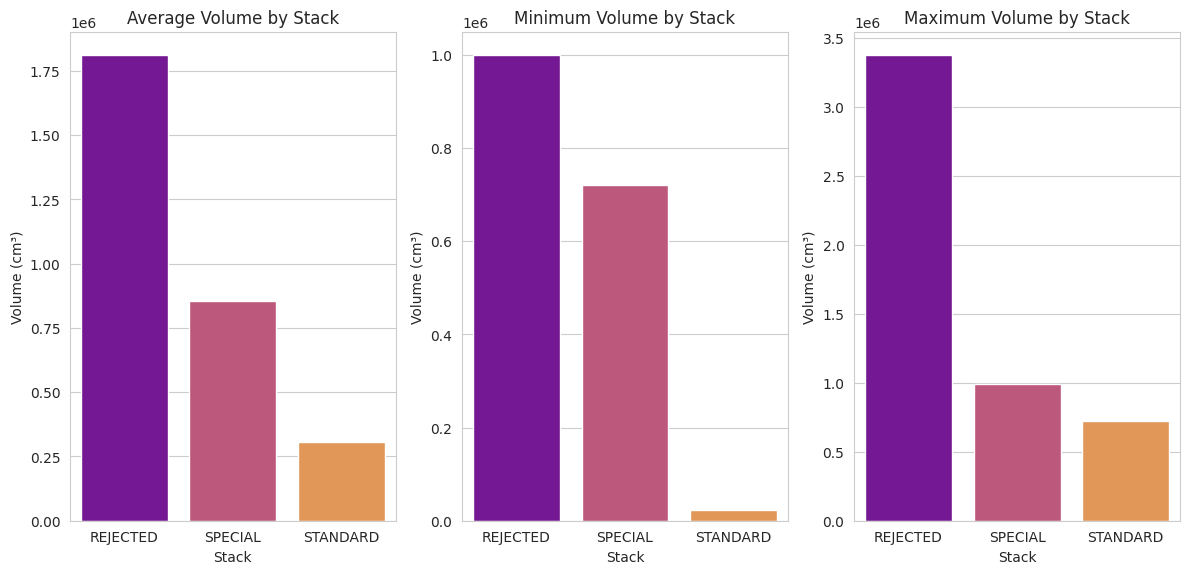

In [36]:
# prompt: using pltomath and seaborn plot the main statiscts form  stack_statistics

!pip install seaborn matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Reset the index to make 'Stack' a column
stack_statistics_reset = stack_statistics.reset_index()

print("\nStatistics by Stack (reset index):")
print(stack_statistics_reset)

# Set the style of the plots
sns.set_style("whitegrid")

# Plotting Mass Statistics by Stack
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.barplot(x='Stack', y='Average_Mass', data=stack_statistics_reset, palette='viridis')
plt.title('Average Mass by Stack')
plt.ylabel('Mass (kg)')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.barplot(x='Stack', y='Minimum_Mass', data=stack_statistics_reset, palette='viridis')
plt.title('Minimum Mass by Stack')
plt.ylabel('Mass (kg)')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.barplot(x='Stack', y='Maximum_Mass', data=stack_statistics_reset, palette='viridis')
plt.title('Maximum Mass by Stack')
plt.ylabel('Mass (kg)')

plt.tight_layout()
plt.show()

# Plotting Volume Statistics by Stack
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1) # 1 row, 3 columns, 1st plot
sns.barplot(x='Stack', y='Average_Volume', data=stack_statistics_reset, palette='plasma')
plt.title('Average Volume by Stack')
plt.ylabel('Volume (cm³)')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd plot
sns.barplot(x='Stack', y='Minimum_Volume', data=stack_statistics_reset, palette='plasma')
plt.title('Minimum Volume by Stack')
plt.ylabel('Volume (cm³)')

plt.subplot(1, 3, 3) # 1 row, 3 columns, 3rd plot
sns.barplot(x='Stack', y='Maximum_Volume', data=stack_statistics_reset, palette='plasma')
plt.title('Maximum Volume by Stack')
plt.ylabel('Volume (cm³)')

plt.tight_layout()
plt.show()